# Draft analysis
## Yepeng Ding
### 12/18/2019

### Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from data_processor import DataProcessor
from anharmonic_oscillator import AnharmonicOscillator

### Data processing

In [2]:
btc_data_processor = DataProcessor(pd.read_csv('./data/BTC_USD_2013-10-01_2019-12-15-CoinDesk.csv'))
eth_data_processor = DataProcessor(pd.read_csv('./data/ETH_USD_2015-08-09_2019-12-19-CoinDesk.csv'))

btc_log_return = btc_data_processor.get_log_return_pdf_norm(2)
eth_log_return = eth_data_processor.get_log_return_pdf_norm(2)

### Simple simulation
#### Construct anharmonic oscillator

In [3]:
omega = 3000
third = 0
fourth = 0
fifth = 0
ao = AnharmonicOscillator(interval_length=0.001, data_size=2000, boundary=0.4, omega=omega, h_bar=1, m=1, coefficient=[third, fourth, fifth])

#### Construct PDF with ground level

In [4]:
pdf = ao.get_pdf_norm_graph()

#### Plot the figure

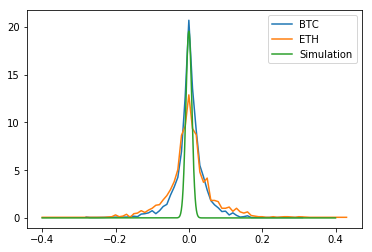

In [5]:
plt.plot(btc_log_return.index, btc_log_return, label='BTC')
plt.plot(eth_log_return.index, eth_log_return, label='ETH')
plt.plot(ao.position, pdf, label='Simulation')
plt.legend()
plt.show()

### Compound simulation
#### Construct anharmonic oscillator

In [6]:
omega = 30000
third = 0
fourth = 0
fifth = 0
ao = AnharmonicOscillator(interval_length=0.001, data_size=2000, boundary=0.4, omega=omega, h_bar=1, m=1, coefficient=[third, fourth, fifth])

#### Construct PDF with compound energy levels

In [7]:
max_level = 100
w = [1.1**i for i in range(max_level, 0, -1)]

pdf_compound = w[0] * ao.get_pdf_norm_graph(0)

for i in range(1, max_level):
    pdf_compound += w[i] * ao.get_pdf_norm_graph(i)

pdf_compound /= sum(w)

#### Plot the figure

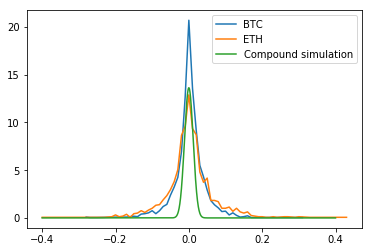

In [8]:
plt.plot(btc_log_return.index, btc_log_return, label='BTC')
plt.plot(eth_log_return.index, eth_log_return, label='ETH')
plt.plot(ao.position, pdf_compound, label='Compound simulation')
plt.legend()
plt.show()